In [1]:
from __future__ import annotations

import os
import time

import drjit as dr

# matplot widget
import matplotlib.pyplot as plt
import mitsuba as mi
import numpy as np
import tensorflow as tf
from sionna.rt import Camera, Paths, PlanarArray, Receiver, Transmitter, load_scene

from jespers_uppgift.instant_rm import MapTracer, PathlossMapRBPTracer

2025-02-12 06:08:34.143687: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-12 06:08:36.951338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


ImportError: Requested an unsupported variant "cuda_ad_mono_polarized". The following variants are available: scalar_rgb, scalar_spectral, cuda_ad_rgb, llvm_ad_rgb.

In [3]:
scene = load_scene("FirstEntrance.xml")


for i, obj in enumerate(scene.objects.values()):
    print(f"{obj.name} : {obj.radio_material.name}")
    if i >= 10:
        break

elm__3 : itu_concrete
elm__6 : itu_brick
elm__7 : itu_metal
elm__8 : itu_brick
elm__9 : itu_metal
elm__11 : itu_glass
elm__12 : itu_metal
elm__13 : itu_glass
elm__14 : itu_metal
elm__15 : itu_brick
elm__16 : itu_metal


In [5]:
# Configure antenna array for all transmitters
scene.tx_array = PlanarArray(
    num_rows=4,
    num_cols=4,
    vertical_spacing=0.5,
    horizontal_spacing=0.5,
    pattern="tr38901",
    polarization="V",
)

# Configure antenna array for all receivers
scene.rx_array = PlanarArray(
    num_rows=1,
    num_cols=1,
    vertical_spacing=0.5,
    horizontal_spacing=0.5,
    pattern="dipole",
    polarization="cross",
)

# Create transmitter
tx = Transmitter(name="tx", position=[-1.3, 9.6, 13], orientation=[0, 0, 0])

tx2 = Transmitter(name="tx2", position=[25, -35.6, 13], orientation=[0, 0, 0])

# Add transmitter instance to scene
scene.add(tx)
scene.add(tx2)

# Create a receiver
rx = Receiver(name="rx", position=[19, 3, 1.5], orientation=[0, 0, 0])

rx2 = Receiver(name="rx2", position=[25, -57, 1.5], orientation=[0, 0, 0])

# Add receiver instance to scene
scene.add(rx)
scene.add(rx2)

# Transmitter points towards receiver
tx.look_at(rx)
tx2.look_at(rx2)

ValueError: Name 'tx' is already used by another item of the scene

In [6]:
cm = scene.coverage_map()
paths = scene.compute_paths()
resolution = [480, 320]

# Create new camera with different configuration
my_cam = Camera("my_cam", position=[150, 61, 90], look_at=[19, 3, 1.5])
scene.add(my_cam)

In [8]:
scene.preview(paths, my_cam, coverage_map=cm)

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

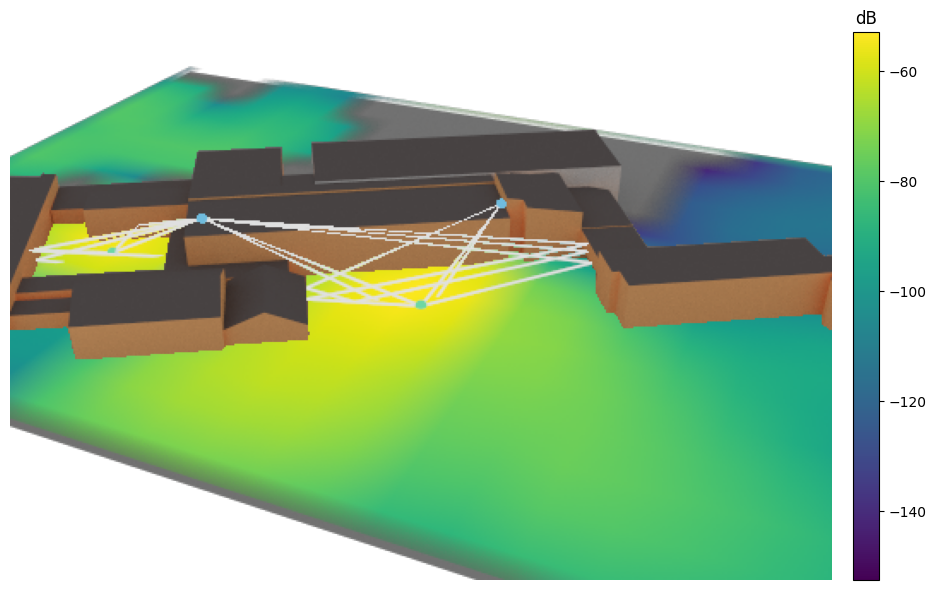

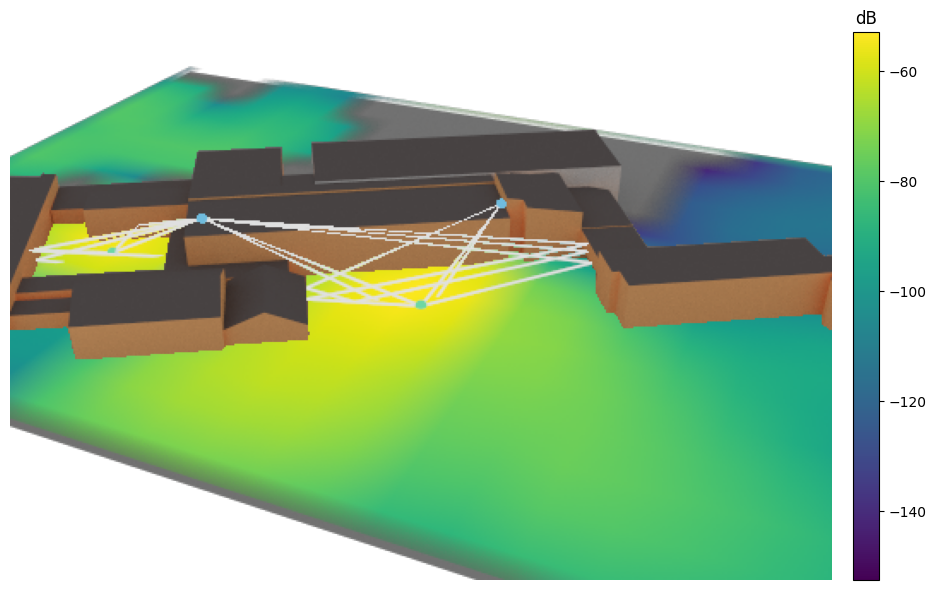

In [9]:
scene.render(
    "my_cam",
    paths=paths,
    show_devices=True,
    show_paths=True,
    coverage_map=cm,
    resolution=[480, 320],
)

In [2]:
miscene = mi.load_file("FirstEntrance.xml")

In [5]:
mi.set_variant("cuda_ad_rgb")
# Instantiate the map tracer
tracer = MapTracer(
    scene,
    fc=3.5e9,  # Carrier frequency [Hz]
    tx_pattern="tr38901",  # Transmit antenna pattern
    tx_slant_angle=0.0,  # Slant angle for the linearly polarized antenna [rad].
    # Zero means vertical polarization
    mp_center=np.array(
        [0.0, 0.0, 1.5],
    ),  # Position of the center of the measurement plane
    mp_orientation=np.array(
        [0.0, 0.0, 0.0],
    ),  # Orientation of the measurement plane [alpha, beta, gamma].
    # [0,0,0] means the normal to the map is z
    mp_size=np.array([500.0, 500.0]),  # Size of the measurement plane
    mp_cell_size=np.array([1.0, 1.0]),  # Size of cells of the measurement plane
    num_samples=int(1e7),  # Number of rays initially shot from the transmitter
    max_depth=10,
)  # Maximum number of bounces

ImportError: Requested an unsupported variant "cuda_ad_mono_polarized". The following variants are available: scalar_rgb, scalar_spectral, cuda_ad_rgb, llvm_ad_rgb.